#Data Preprocessing Tools

##Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Importing the dataset

In [ ]:
dataset = pd.read_csv('Salary_Data.csv')
# dataset

In [ ]:
x = dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values
# print(x)
# print(y)

##Taking care of the missing data

In [ ]:
missing_data = dataset.isnull().sum()
missing_data

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values =np.nan,strategy='mean')
# imputer.fit(x[:,1:3])
# x[:,1:3]=imputer.transform(x[:,1:3])

In [ ]:
# print(x)

##Encoding categorical data

###Encoding independent variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])] ,
                       remainder='passthrough' )

In [ ]:
x1=np.array(ct.fit_transform(x))
x1

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

###Encoding dependent variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y1=le.fit_transform(y)
y1

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

##Splittinf dataset into training_dataset and test_dataset

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size =0.2,random_state=1)

In [1]:
# print(x_train)

In [ ]:
print(x_test)

[[5.3]
 [7.1]
 [3.9]
 [6. ]
 [4.5]
 [6.8]]


In [ ]:
print(y_train)

[116969.  43525. 109431. 101302. 113812.  39891.  37731. 105582.  60150.
  81363.  57081.  54445. 112635.  46205.  66029.  39343.  67938. 121872.
 122391.  57189.  64445.  56957.  55794.  56642.]


In [ ]:
print(y_test)

[83088. 98273. 63218. 93940. 61111. 91738.]


##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[:,3:] = scaler.fit_transform(x_train[:,3:])
x_test[:,3:] = scaler.transform(x_test[:,3:])

In [ ]:
print(x_train)

[[ 9.5]
 [ 2. ]
 [ 8.7]
 [ 7.9]
 [ 8.2]
 [ 2.2]
 [ 1.5]
 [ 9. ]
 [ 3. ]
 [ 5.9]
 [ 4.1]
 [ 3.2]
 [ 9.6]
 [ 1.3]
 [ 5.1]
 [ 1.1]
 [ 4.9]
 [10.5]
 [10.3]
 [ 3.7]
 [ 3.2]
 [ 4. ]
 [ 4. ]
 [ 2.9]]


In [ ]:
print(x_test)

[[5.3]
 [7.1]
 [3.9]
 [6. ]
 [4.5]
 [6.8]]


#Data Modelling

##Training the simple Linear Regression model on the training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

##Predicting the test set results

In [ ]:
y_pred=regressor.predict(x_test)
y_pred

array([75074.50510972, 91873.8056381 , 62008.38247653, 81607.56642631,
       67608.14931932, 89073.92221671])

## Visualising the training set results

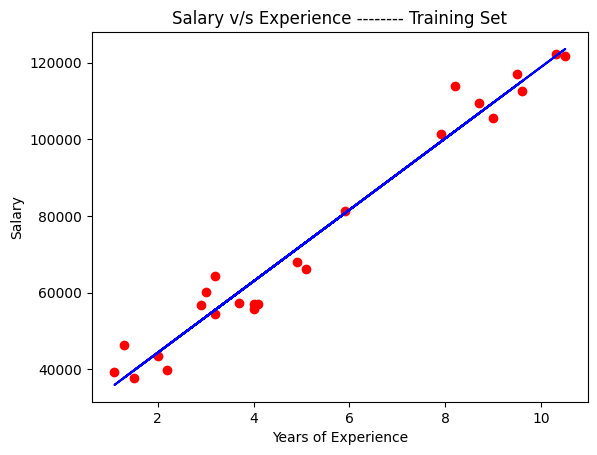

In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title("Salary v/s Experience -------- Training Set")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the test set results

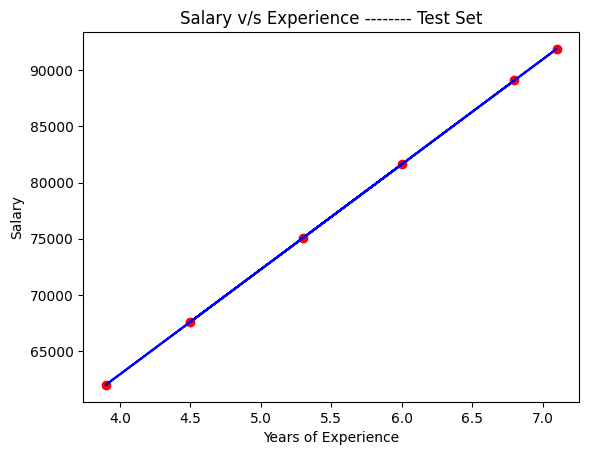

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,regressor.predict(x_test),color='blue')
plt.title("Salary v/s Experience -------- Test Set")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()